<a href="https://colab.research.google.com/github/DonRoboto/RandomNumbers/blob/master/CONTINUOUS_RANDOM_VARIATES/distribucion_erlang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DISTRIBUCION ERLANG

Importamos librerias

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

Definimos variables

In [0]:
beta = 5
m = 4

lmd = (m / beta)
k = m

x = np.linspace(0, 20, 10000)
y = [0] * len(x)

Fórmula analítica de la distribución Erlang

In [0]:
for n in range(len(x)):    
    y[n] = (lmd * np.exp(-lmd * x[n])) * (((lmd * x[n])**(k - 1))/(math.factorial(k - 1)))    


Simulaciones para obtener la distribución Erlang con variables aleatorias con distribución uniforme utilizando el método de convolución

In [0]:
num_simulaciones = 7000
data = []

for k in range(num_simulaciones):

    #suma de variables aleatorias uniformes
    u_aux = np.random.uniform(0,1)    
    for t in range(1, m):
        u_aux = u_aux * np.random.uniform(0,1)
        
    u_final = (-beta / m) * np.log(u_aux)
        
    data.append(u_final)

Graficamos y comparamos ambas distribuciones

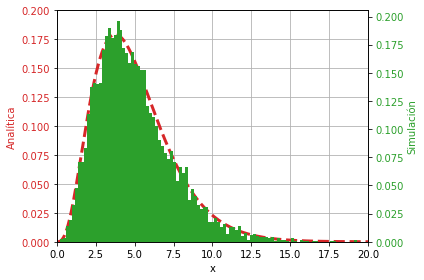

In [5]:
fig, ax1 = plt.subplots()
plt.grid(True)
plt.ylim(top=0.2)
plt.ylim(bottom=0)

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('Analítica', color=color)
ax1.plot(x, y, 'r--', color=color, linewidth=3.0)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 20)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Simulación', color=color)  
ax2.hist(data,bins=100, color=color, density=True)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()